<a href="https://colab.research.google.com/github/Guhan2348519/QC_LAB/blob/main/2348519_QC_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Superdense coding is a quantum communication protocol that allows a sender to send two classical bits of information to another user by only utilizing one qubit.

while Superdense Coding and Quantum Teleportation are closely related, there is a key difference between them. Quantum teleportation is a process by which a user can transmit one qubit using two classical bits whereas Superdense Coding is a process by which a user can transmit two classical bits using one qubit. Basically, Superdense Coding can be thought of as the flipped version of Quantum Teleportation.

In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.1 MB/s eta 0:00:00


In [2]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.9 MB/s eta 0:00:00


In [3]:

!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=02b5b2cd8791ba473cf275b30a7d8e671f1030cd80ffa28567ec5995d9ca8932
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [4]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [5]:
c="1"
d="0"

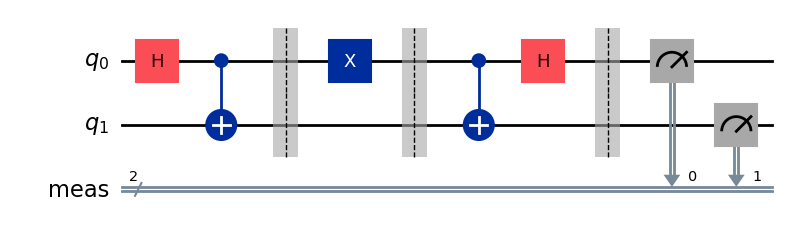

In [8]:
from qiskit.visualization import plot_histogram, circuit_drawer
import pylatexenc
protocol=QuantumCircuit (2)
#Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

#Alice's operations
if d == "1":
 protocol.z(0)
if c == "1":
 protocol.x(0)
 protocol.barrier()

#Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()
circuit_drawer(protocol, output='mpl')

Measured (outcome) with frequency (frequency)


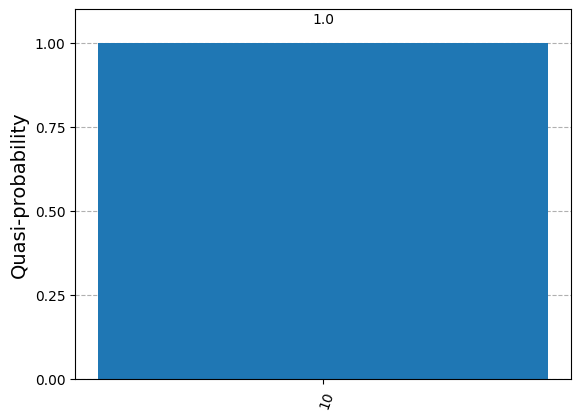

In [9]:
result=Sampler().run(protocol).result()
statistics=result.quasi_dists[0].binary_probabilities()
for outcome,frequency in statistics.items():
 print(f"Measured (outcome) with frequency (frequency)")
display(plot_histogram(statistics))

In [10]:
rbg=QuantumRegister(1, "randomizer")
ebit0=QuantumRegister(1, "A")
ebit1=QuantumRegister(1, "B")
Alice_c=ClassicalRegister(1, "Alice c")
Alice_d=ClassicalRegister(1, "Alice d")

In [11]:
test=QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

In [12]:
#Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'randomizer'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [13]:
#Use the randomizer qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'randomizer'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [14]:

#Now the protocol runs, starting with Alice's actions, which depend
#on her bits.
with test.if_test((Alice_d, 1), label="Z"):
 test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
 test.x(ebit1)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'randomizer'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

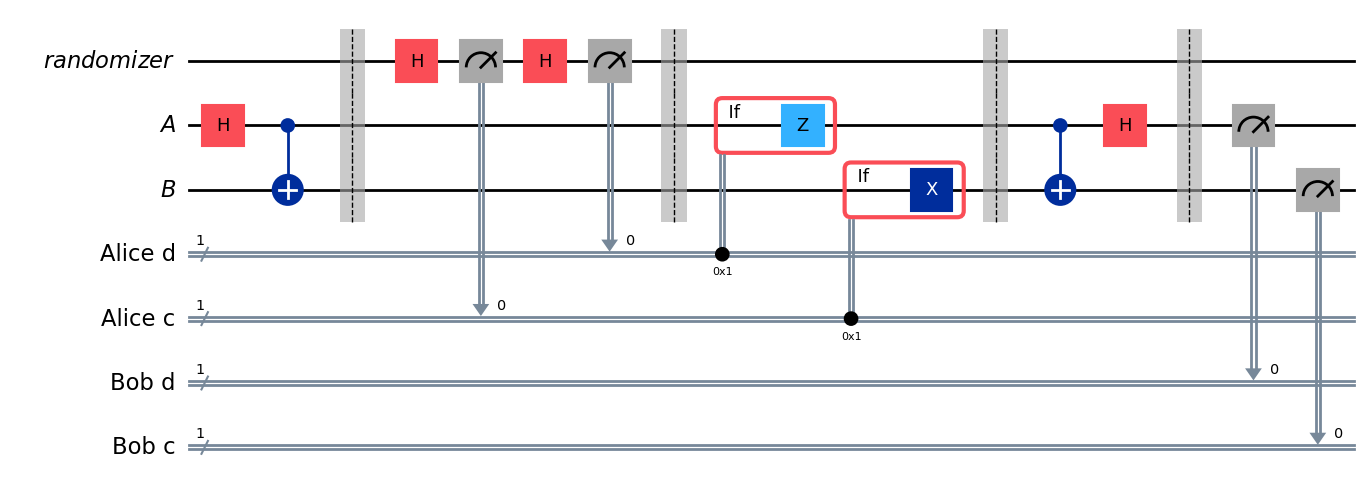

In [15]:
#Bob's actions
test.cx(ebit0,ebit1)
test.h(ebit0)
test.barrier()
Bob_c=ClassicalRegister(1, "Bob c")
Bob_d=ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)
circuit_drawer(test, output='mpl')

In [24]:
!pip install qiskit_aer

In [25]:
from qiskit_aer import AerSimulator

In [20]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram,circuit_drawer
import matplotlib.pyplot as plt

# Step 1: Create Quantum and Classical Registers
rbg = QuantumRegister(1, "randomizer")  # Random bit generator
ebit0 = QuantumRegister(1, "A")  # Alice's qubit
ebit1 = QuantumRegister(1, "B")  # Bob's qubit
Alice_c = ClassicalRegister(1, "Alice_c")
Alice_d = ClassicalRegister(1, "Alice_d")
Bob_c = ClassicalRegister(1, "Bob_c")
Bob_d = ClassicalRegister(1, "Bob_d")

# Step 2: Initialize the circuit with the registers
protocol = QuantumCircuit(rbg, ebit0, ebit1, Alice_c, Alice_d, Bob_c, Bob_d)

# Step 3: Prepare the shared entangled state (ebit)
protocol.h(ebit0)       # Create superposition on Alice's qubit
protocol.cx(ebit0, ebit1)  # Entangle with Bob's qubit
protocol.barrier()

# Step 4: Generate random bits c and d using the randomizer qubit
protocol.h(rbg)
protocol.measure(rbg, Alice_c)
protocol.h(rbg)
protocol.measure(rbg, Alice_d)
protocol.barrier()

# Step 5: Alice's operations based on her random bits c and d
# Apply Z gate if d == 1
protocol.z(ebit0).c_if(Alice_d, 1)
# Apply X gate if c == 1
protocol.x(ebit0).c_if(Alice_c, 1)
protocol.barrier()

# Step 6: Bob's operations to decode the message
protocol.cx(ebit0, ebit1)
protocol.h(ebit0)
protocol.barrier()

# Step 7: Measure to extract Bob's bits
protocol.measure(ebit0, Bob_d)
protocol.measure(ebit1, Bob_c)


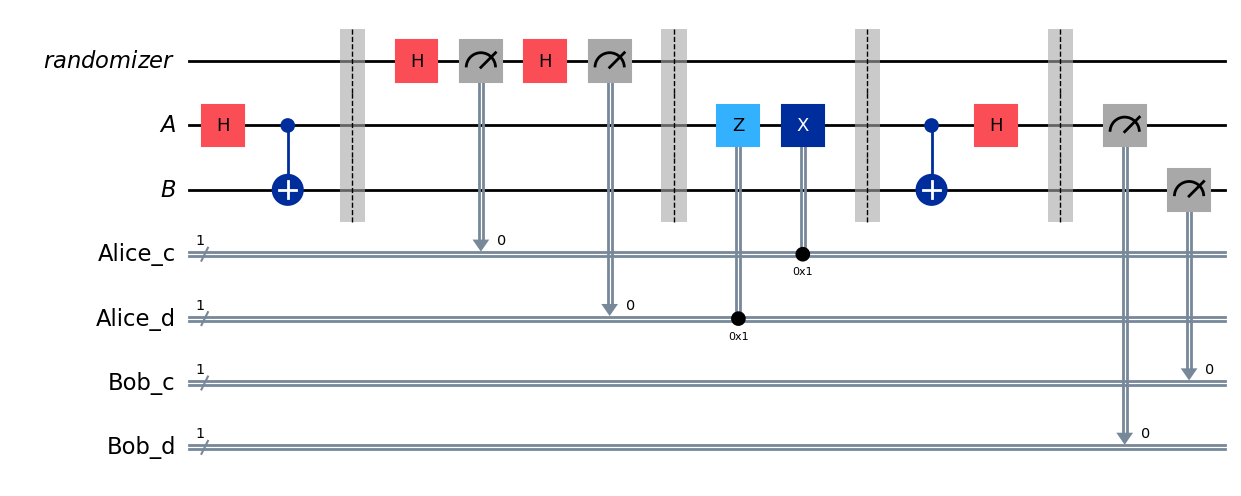

In [21]:

# Display the quantum circuit
circuit_drawer(protocol, output='mpl')


In [22]:

# Step 8: Run the circuit using the Qiskit Aer Sampler
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()


In [23]:

# Print the results
for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency:.2f}")


Measured 0000 with frequency 0.28
Measured 1010 with frequency 0.27
Measured 1111 with frequency 0.24
Measured 0101 with frequency 0.21
